## Lending Club Group Case Study
##### Group Members:  
    Ashish Kumar Singh (Group Facilitator)
    Rohitash Tulyani

##### Prerequisite
    a. Python - 3.7.11
    b. matplotlib - 3.4.3
    c. seaborn - 0.11.2
    d. pandas - 1.2.4
    c. numpy - 1.8.5

In [ ]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
#To display all the columns
pd.options.display.max_columns = None
sns.set()

In [3]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Data Loading

In [4]:
#Importing the data
loan_data = pd.read_csv("loan.csv")

In [5]:
#Checking the first few records to validate data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
#Check the basic statistical details of a data frame
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### 2. Data Cleaning

In [7]:
#Check the shape of the dataframe
print('----- Shape of Dataframe -----')
print(loan_data.shape)
#Check the null values present in the columns
print('')
print('----- NULL or NaN value details ofDataframe -----')
print(loan_data.isnull().sum())

----- Shape of Dataframe -----
(39717, 111)

----- NULL or NaN value details ofDataframe -----
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [8]:
#We can observe that there are lot of columns with no data(all values NULL or NaN). We can drop them safely.
loan_data.dropna(axis = 1, how = 'all', inplace = True)

In [9]:
#Check the percentage of NULL of NaN values in the remaining columns
col_null_prcnt = round(100 * (loan_data.isnull().sum()/loan_data.shape[0]), 2)
col_null_prcnt[col_null_prcnt > 0].sort_values(ascending = False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

In [10]:
#After analyzing the columns next_pymnt_d, mths_since_last_record. We find that the columns have most of the values as NaN and can be safely dropped.
loan_data.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1, inplace = True)

In [11]:
#mths_since_last_delinq has more than 64% of the value as NaN and is also a post approval feature, hence can be dropped safely.
loan_data.drop(['mths_since_last_delinq'], axis=1, inplace = True)

In [12]:
#desc has more that 32% missing value and also purpose has concise information which is related to desc and we can drop it safely
loan_data.drop(['desc'], axis=1, inplace = True)

In [13]:
#Check the number unique values for columns
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [14]:
#Now let us remove all cloumns where number of unique values is 1 as this will not help in analysis
for column in loan_data.columns:
    if loan_data[column].nunique() == 1:
        loan_data.drop(column, inplace=True, axis=1)

In [15]:
#We see that columns member_id, url and id have all the values as unique and these don't add any value to analysis, hence can we dropped.
loan_data.drop(['member_id', 'url', 'id'], axis=1, inplace = True)

In [16]:
#After removing the columns we are left with 41 columns. Now let us look at data dictionary file provided to understand more about these columns.
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
#total_rec_int, total_rec_prncp, total_rec_late_fee, last_pymnt_d, out_prncp, out_prncp_inv are the characteristics of barrowers who already took loan and in process of paying installment and hence can be dropped
loan_data.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv'], axis=1, inplace = True)

#recoveries, collection_recovery_fee are only valid for charged off loans and do not add any value to analysis and can be dropped
loan_data.drop(['recoveries', 'collection_recovery_fee'], axis=1, inplace = True)

In [18]:
#value of the funded_amnt and funded_amnt_inv is almost equivalent to loan_amnt and hence can be dropped
loan_data.drop(['funded_amnt', 'funded_amnt_inv'], axis=1, inplace = True)

#emp_title is almost unique and may not add much value and can be dropped
loan_data.drop(['emp_title'], axis=1, inplace = True)

#we already have addr_state and hence zip_code can be dropped as it may not offer much value
loan_data.drop(['zip_code'], axis=1, inplace = True)

In [19]:
#Checking the shape of the dataframe after removing the columns
print(loan_data.shape)

(39717, 26)


In [20]:
#Drop the rows where loan_status is Current, as the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [21]:
#Checking the shape of the dataframe after removing the columns
print('----- Shape of Dataframe -----')
print(loan_data.shape)

print('')
print('----- Checking value counts of loan_status -----')
print(loan_data['loan_status'].value_counts())

----- Shape of Dataframe -----
(38577, 26)

----- Checking value counts of loan_status -----
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


### Handling Missing values

In [22]:
#Check the percentage of NULL of NaN values in the remaining columns that needs to be handled
col_null_prcnt = round(100 * (loan_data.isnull().sum()/loan_data.shape[0]), 2)
col_null_prcnt[col_null_prcnt > 0].sort_values(ascending = False)

emp_length              2.68
pub_rec_bankruptcies    1.81
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64

In [23]:
# Dropping the rows where emp_length, pub_rec_bankruptcies is NaN instead of replacing with the mode, this is to ensure we don't add any bais to the data.
loan_data.dropna(subset=['emp_length', 'pub_rec_bankruptcies'], inplace=True)

In [24]:
#dropping the rows where revol_util, title is NaN as the % of missing values is very less 
loan_data.dropna(subset=['revol_util', 'title'], inplace=True)

In [25]:
#Dropping any Duplicate Rows, if any (Keeping the First Value and dropping the rest)
loan_data.drop_duplicates(keep = 'first', inplace = True)

In [26]:
#Check the percentage of NULL of NaN values in the remaining columns that needs to be handled
col_null_prcnt = round(100 * (loan_data.isnull().sum()/loan_data.shape[0]), 2)
col_null_prcnt[col_null_prcnt > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [27]:
#clean the data, remove % at the end and convert to float
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x : x.split('%')[0]))

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36790 entries, 0 to 39680
Data columns (total 26 columns):
loan_amnt               36790 non-null int64
term                    36790 non-null object
int_rate                36790 non-null float64
installment             36790 non-null float64
grade                   36790 non-null object
sub_grade               36790 non-null object
emp_length              36790 non-null object
home_ownership          36790 non-null object
annual_inc              36790 non-null float64
verification_status     36790 non-null object
issue_d                 36790 non-null object
loan_status             36790 non-null object
purpose                 36790 non-null object
title                   36790 non-null object
addr_state              36790 non-null object
dti                     36790 non-null float64
delinq_2yrs             36790 non-null int64
earliest_cr_line        36790 non-null object
inq_last_6mths          36790 non-null int64
open_acc        

#### Remove Outlier

----- Basic statistical details of Borrowers Annual Income -----
count    3.679000e+04
mean     6.943917e+04
std      6.402864e+04
min      4.000000e+03
25%      4.116900e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




[]

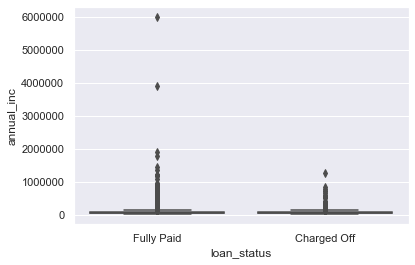

In [29]:
print('----- Basic statistical details of Borrowers Annual Income -----')
print(loan_data.annual_inc.describe())
print('\n')

# Box plot of borrowers annual_inc
sns.boxplot(x="loan_status", y='annual_inc',data=loan_data)

plt.plot()

Quantile Value = 235000.0


count     36421.000000
mean      66004.407221
std       35104.270644
min        4000.000000
25%       41000.000000
50%       59068.000000
75%       81996.000000
max      234996.000000
Name: annual_inc, dtype: float64




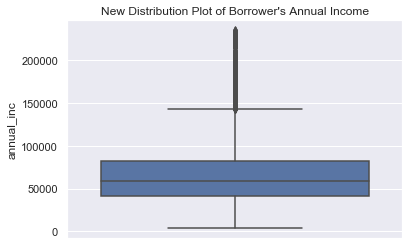

In [30]:
qnt = loan_data.annual_inc.quantile(0.99)
print('Quantile Value =', qnt)
print('\n')

loan_data = loan_data[loan_data.annual_inc < qnt]

print(loan_data.annual_inc.describe())
print('\n')

plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan_data)

In [31]:
#converting issue_d and earliest_cr_line to date time
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

#### Derived Variables

In [32]:
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year

loan_data['earliest_cr_line_month'] = loan_data['issue_d'].dt.month
loan_data['earliest_cr_line_year'] = loan_data['issue_d'].dt.year

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan_data['loan_amnt_ctgry'] = pd.cut(loan_data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000', '35000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan_data['annual_inc_ctgry'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_data['int_rate_ctgry'] = pd.cut(loan_data['int_rate'], [0, 5, 10, 12.5, 15, 17.5, 20], labels=['0-5', '5-10', '10-12.5', '12.5-15', '15-17.5', '17.5 +'])

# categorise dti into buckets for bivariate analysis.
loan_data['dti_ctgry'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25', '25+'])

In [33]:
#Checking the first few records to validate data
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,loan_amnt_ctgry,annual_inc_ctgry,int_rate_ctgry,dti_ctgry
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,May-16,0.0,12,2011,12,2011,0-5000,20000-40000,10-12.5,25+
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,Sep-13,0.0,12,2011,12,2011,0-5000,20000-40000,15-17.5,0-5
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,May-16,0.0,12,2011,12,2011,0-5000,0-20000,15-17.5,05-10
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,Apr-16,0.0,12,2011,12,2011,5000-10000,40000-60000,12.5-15,15-20
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,Jan-16,0.0,12,2011,12,2011,0-5000,20000-40000,5-10,10-15


In [34]:
#Check the number unique values for columns to find the categorical 
loan_data.nunique().sort_values()

term                          2
loan_status                   2
pub_rec_bankruptcies          3
verification_status           3
home_ownership                4
annual_inc_ctgry              5
earliest_cr_line_year         5
issue_d_year                  5
pub_rec                       5
int_rate_ctgry                5
dti_ctgry                     6
loan_amnt_ctgry               7
grade                         7
inq_last_6mths                9
delinq_2yrs                  11
emp_length                   11
earliest_cr_line_month       12
issue_d_month                12
purpose                      14
sub_grade                    35
open_acc                     38
addr_state                   49
issue_d                      52
total_acc                    81
last_credit_pull_d           97
int_rate                    336
earliest_cr_line            513
loan_amnt                   852
revol_util                 1086
dti                        2848
annual_inc                 4794
installm

### Loan Amount Distribution & Basic Statistical Details

----- Basic statistical details of a loan amount -----
count    36421.000000
mean     11062.211362
std       7285.538947
min        500.000000
25%       5500.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64




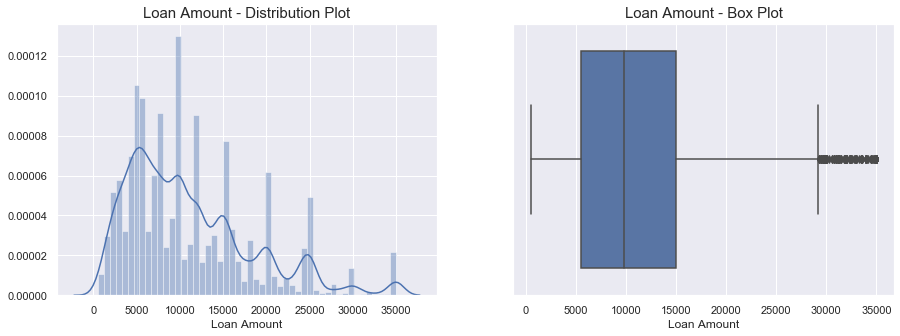

In [35]:
#Stats of laon amount
print('----- Basic statistical details of a loan amount -----')
print(loan_data['loan_amnt'].describe())
print('\n')

plt.figure(figsize=(15,5))
#Histogram plot
plt.subplot(1, 2, 1)
ax1=sns.distplot(loan_data['loan_amnt'])
ax1.set_title('Loan Amount - Distribution Plot', fontsize=15)
ax1.set(xlabel='Loan Amount')
#Box plot
plt.subplot(1, 2, 2)
ax2=sns.boxplot(loan_data['loan_amnt'])
ax2.set_title('Loan Amount - Box Plot', fontsize=15)
ax2.set(xlabel='Loan Amount')

plt.show()

Observations: Most people took loan between 5000 and 15000, median is 10000 and very few people took loan greater than 25000.

## 3. Data Analysis

### 1. Univariate Analysis 
#### Unordered Categorical Variables

Percentage of Fully Paid & Charged Off Loan
Fully Paid     85.653881
Charged Off    14.346119
Name: loan_status, dtype: float64




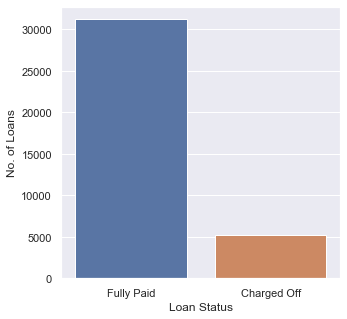

In [36]:
# Rank Frequency plot for Unordered Categorical Variable: loan_status
print('Percentage of Fully Paid & Charged Off Loan')
print(loan_data['loan_status'].value_counts()*100/len(loan_data))
print('\n')

plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loan_data)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

##### Observations : 
    a. Around 14% loans were charged off out of total loan issued.

----- Percentage of Fully Paid & Charged Off Loan based on Home Ownership -----
loan_status  home_ownership
Charged Off  RENT               2651
             MORTGAGE           2173
             OWN                 383
             OTHER                18
Fully Paid   RENT              14932
             MORTGAGE          13898
             OWN                2290
             OTHER                76
Name: home_ownership, dtype: int64




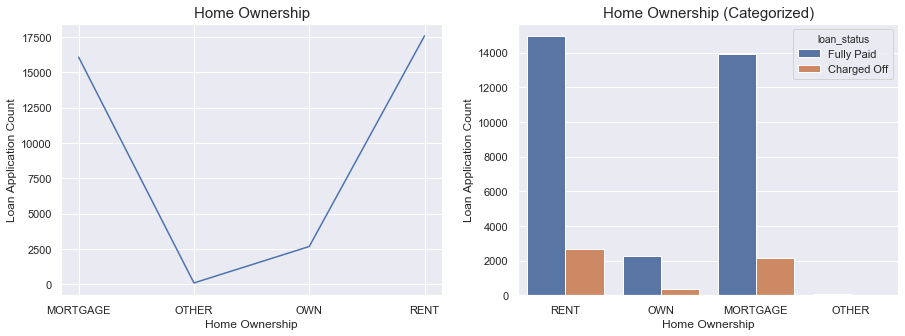

----- Percentage of Fully Paid & Charged Off Loan based on Employemnt Length -----
loan_status home_ownership  Charged Off  Fully Paid  Total  \
0                 MORTGAGE         2173       13898  16071   
1                    OTHER           18          76     94   
2                      OWN          383        2290   2673   
3                     RENT         2651       14932  17583   

loan_status  Chargedoff_Proportion  
0                        13.521249  
1                        19.148936  
2                        14.328470  
3                        15.077063  


In [53]:
# Basic Statistical Details & Rank-Frequency Plot of Unordered Categorical Variable: home_ownership
print('----- Percentage of Fully Paid & Charged Off Loan based on Home Ownership -----')
print(loan_data.groupby(by = 'loan_status').home_ownership.value_counts(sort = True))
print('\n')

plt.figure(figsize=(15,5))
#line plot
plt.subplot(1, 2, 1)
ax1=sns.lineplot(data=loan_data.home_ownership.value_counts())
ax1.set_title('Home Ownership', fontsize=15)
ax1.set(xlabel='Home Ownership', yLabel='Loan Application Count')

#Count plot
plt.subplot(1, 2, 2)
ax2=sns.countplot(x="home_ownership",data=loan_data,hue='loan_status')
ax2.set_title('Home Ownership (Categorized)', fontsize=15)
ax2.set(xlabel='Home Ownership', yLabel='Loan Application Count')

plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Home Ownership -----')
loan_data_home_ownership = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_home_ownership['Total'] = loan_data_home_ownership['Charged Off'] + loan_data_home_ownership['Fully Paid'] 
loan_data_home_ownership['Chargedoff_Proportion'] = loan_data_home_ownership['Charged Off'] / loan_data_home_ownership['Total'] * 100
loan_data_home_ownership.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_home_ownership)

##### Observations : 
    a. From the above graph we can observe that very small amount of people own house
    b. We can also observe that the charged off is higher for the home ownership Rent and Other. There is not much difference in charged of proportion for Own and Mortgage.

----- Percentage of Fully Paid & Charged Off Loan based on Purpose -----
loan_status  purpose           
Charged Off  debt_consolidation     2607
             other                   574
             credit_card             496
             small_business          442
             home_improvement        311
             major_purchase          204
             car                     151
             medical                  99
             wedding                  88
             moving                   80
             house                    57
             vacation                 50
             educational              48
             renewable_energy         18
Fully Paid   debt_consolidation    14628
             credit_card            4263
             other                  2988
             home_improvement       2347
             major_purchase         1830
             car                    1271
             small_business         1186
             wedding              

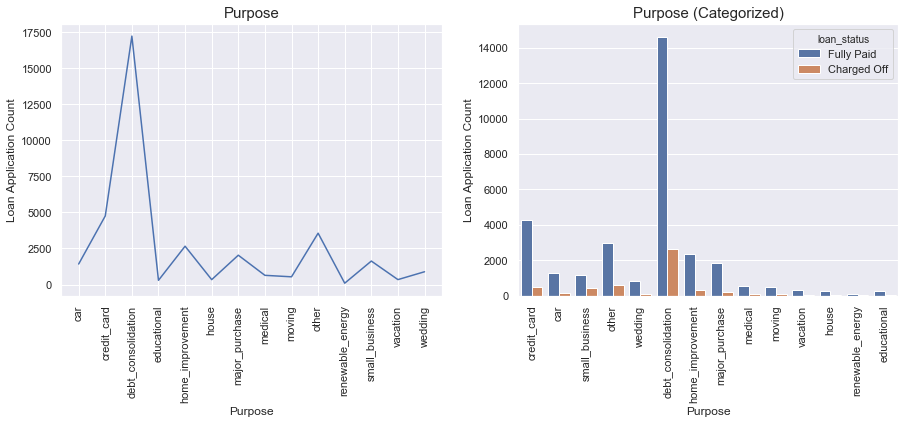

----- Percentage of Fully Paid & Charged Off Loan based on Purpose -----
loan_status             purpose  Charged Off  Fully Paid  Total  \
0                           car          151        1271   1422   
1                   credit_card          496        4263   4759   
2            debt_consolidation         2607       14628  17235   
3                   educational           48         244    292   
4              home_improvement          311        2347   2658   
5                         house           57         282    339   
6                major_purchase          204        1830   2034   
7                       medical           99         539    638   
8                        moving           80         455    535   
9                         other          574        2988   3562   
10             renewable_energy           18          74     92   
11               small_business          442        1186   1628   
12                     vacation           50         291

In [132]:
# Basic Statistical Details & Rank-Frequency Plot of Unordered Categorical Variable: purpose
print('----- Percentage of Fully Paid & Charged Off Loan based on Purpose -----')
print(loan_data.groupby(by = 'loan_status').purpose.value_counts(sort = True))
print('\n')

plt.figure(figsize=(15,5))
#line plot
plt.subplot(1, 2, 1)
ax1=sns.lineplot(data=loan_data.purpose.value_counts())
ax1.set_title('Purpose', fontsize=15)
ax1.set(xlabel='Purpose', yLabel='Loan Application Count')
plt.xticks(rotation=90)

#Count plot
plt.subplot(1, 2, 2)
ax2=sns.countplot(x="purpose",data=loan_data,hue='loan_status')
ax2.set_title('Purpose (Categorized)', fontsize=15)
ax2.set(xlabel='Purpose', yLabel='Loan Application Count')

plt.xticks(rotation=90)
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Purpose -----')
loan_data_purpose = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_purpose['Total'] = loan_data_purpose['Charged Off'] + loan_data_purpose['Fully Paid'] 
loan_data_purpose['Chargedoff_Proportion'] = loan_data_purpose['Charged Off'] / loan_data_purpose['Total'] * 100
loan_data_purpose.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_purpose)

##### Observations :  
    a. Above plot shows that most of the loans were taken for the purpose of debt consolidation, paying credit card bill, other & small business.
    b. Number of chraged off loan count is also high for these loans.

----- Percentage of Fully Paid & Charged Off Loan based on Address State -----
loan_status  addr_state
Charged Off  CA            1041
             NY             457
             FL             456
             TX             300
             NJ             268
                           ... 
Fully Paid   TN               8
             ID               4
             IA               1
             IN               1
             NE               1
Name: addr_state, Length: 94, dtype: int64




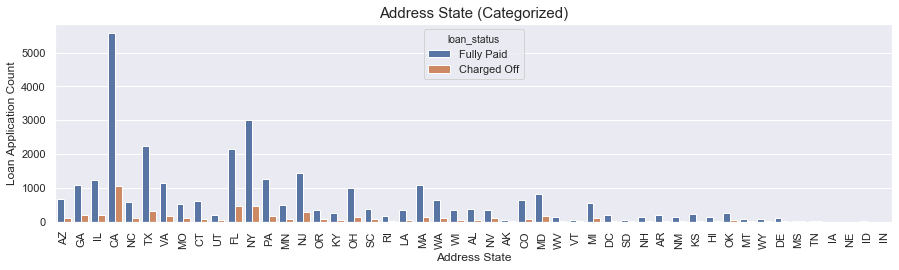

----- Percentage of Fully Paid & Charged Off Loan based on Address State -----
loan_status addr_state  Charged Off  Fully Paid   Total  Chargedoff_Proportion
0                   AK         14.0        60.0    74.0              18.918919
1                   AL         50.0       358.0   408.0              12.254902
2                   AR         26.0       197.0   223.0              11.659193
3                   AZ        111.0       669.0   780.0              14.230769
4                   CA       1041.0      5571.0  6612.0              15.744102
5                   CO         86.0       624.0   710.0              12.112676
6                   CT         87.0       596.0   683.0              12.737921
7                   DC         14.0       192.0   206.0               6.796117
8                   DE         11.0        96.0   107.0              10.280374
9                   FL        456.0      2153.0  2609.0              17.477961
10                  GA        202.0      1084.0  128

In [133]:
# Basic Statistical Details & Rank-Frequency Plot of Unordered Categorical Variable: addr_state
print('----- Percentage of Fully Paid & Charged Off Loan based on Address State -----')
print(loan_data.groupby(by = 'loan_status').addr_state.value_counts(sort = True))
print('\n')

plt.figure(figsize=(15,8))
#Count plot
plt.subplot(2, 1, 1)
ax2=sns.countplot(x="addr_state",data=loan_data,hue='loan_status')
ax2.set_title('Address State (Categorized)', fontsize=15)
ax2.set(xlabel='Address State', yLabel='Loan Application Count')

plt.xticks(rotation=90)
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Address State -----')
loan_data_addr_state = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_addr_state['Total'] = loan_data_addr_state['Charged Off'] + loan_data_addr_state['Fully Paid'] 
loan_data_addr_state['Chargedoff_Proportion'] = loan_data_addr_state['Charged Off'] / loan_data_addr_state['Total'] * 100
loan_data_addr_state.sort_values('Chargedoff_Proportion', ascending=False)
print(loan_data_addr_state)

##### Observations :
    a. Top Address States for charged off loans are CA, NY,FL, TX & NJ

----- Percentage of Fully Paid & Charged Off Loan based on Verification Status -----
loan_status  verification_status
Charged Off  Verified                1929
             Not Verified            1914
             Source Verified         1382
Fully Paid   Not Verified           13558
             Verified                9658
             Source Verified         7980
Name: verification_status, dtype: int64




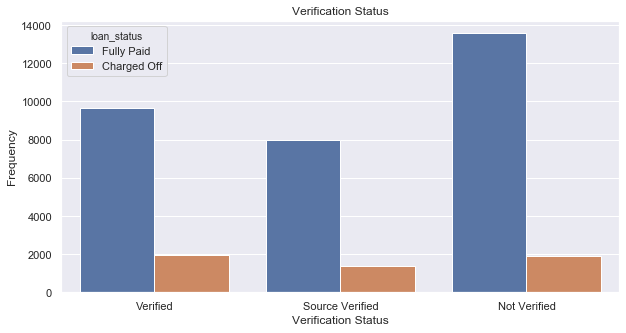

In [40]:
# Basic Statistical Details & Rank-Frequency Plot of Unordered Categorical Variable: verification_status
print('----- Percentage of Fully Paid & Charged Off Loan based on Verification Status -----')
print(loan_data.groupby(by = 'loan_status').verification_status.value_counts(sort = True))
print('\n')

plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_status",data=loan_data,hue='loan_status')
ax.set_title('Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')      
plt.show()


##### Observations :
    a. Charged Off loan is present across all the verification states, the percentage of Charged Off is higher for Verified Loan

##### Ordered Categorical Variables are:



loan_status  term      
Charged Off   36 months     2920
              60 months     2305
Fully Paid    36 months    24356
              60 months     6840
Name: term, dtype: int64




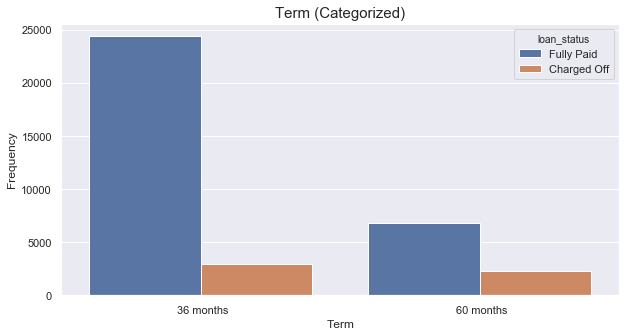

In [41]:
# Basic Statistical Details & Rank-Frequency Plot of Ordered Categorical Variable: term
print('----- Percentage of Fully Paid & Charged Off Loan based on Term -----')
print(loan_data.groupby(by = 'loan_status').term.value_counts(dropna = False).sort_index())
print('\n')

plt.figure(figsize=(10,5))
ax1=sns.countplot(x="term",data=loan_data,hue='loan_status')
ax1.set_title('Term (Categorized)', fontsize=15)
ax1.set(xlabel='Term', yLabel='Frequency')

plt.show()

##### Observations :
    a. The probability of Loan getting Charged Off is higher for people who opted for 60 Months than compared to the ones who opted for 36 Months

Basic Statistical Details of emp_length
loan_status  emp_length
Charged Off  1 year         437
             10+ years     1288
             2 years        549
             3 years        545
             4 years        442
             5 years        451
             6 years        297
             7 years        257
             8 years        199
             9 years        155
             < 1 year       605
Fully Paid   1 year        2609
             10+ years     6949
             2 years       3608
             3 years       3367
             4 years       2821
             5 years       2678
             6 years       1818
             7 years       1414
             8 years       1193
             9 years       1043
             < 1 year      3696
Name: emp_length, dtype: int64




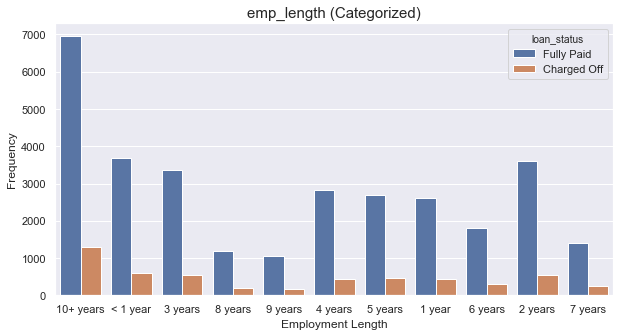

----- Percentage of Fully Paid & Charged Off Loan based on Employemnt Length -----
loan_status emp_length  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0               1 year          437        2609   3046              14.346684
1            10+ years         1288        6949   8237              15.636761
2              2 years          549        3608   4157              13.206639
3              3 years          545        3367   3912              13.931493
4              4 years          442        2821   3263              13.545817
5              5 years          451        2678   3129              14.413551
6              6 years          297        1818   2115              14.042553
7              7 years          257        1414   1671              15.380012
8              8 years          199        1193   1392              14.295977
9              9 years          155        1043   1198              12.938230
10            < 1 year          605        3696   4301     

In [52]:
# Basic Statistical Details & Rank-Frequency Plot of Ordered Categorical Variable: emp_length
print('Basic Statistical Details of emp_length')
print(loan_data.groupby(by = 'loan_status').emp_length.value_counts().sort_index())
print('\n')

plt.figure(figsize=(10,5))
ax1=sns.countplot(x="emp_length",data=loan_data,hue='loan_status')
ax1.set_title('emp_length (Categorized)', fontsize=15)
ax1.set(xlabel='Employment Length', yLabel='Frequency')

plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Employemnt Length -----')
loan_data_emp_length = loan_data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_emp_length['Total'] = loan_data_emp_length['Charged Off'] + loan_data_emp_length['Fully Paid'] 
loan_data_emp_length['Chargedoff_Proportion'] = loan_data_emp_length['Charged Off'] / loan_data_emp_length['Total'] * 100
loan_data_emp_length.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_emp_length)

##### Observations :
    a. From the above graph we can see that there is slightly higher chance of loan getting charged off for employee length 7 years and 10+ years. Overall there is not huge difference between employment length and charged off loan proportion.

----- Percentage of Fully Paid & Charged Off Loan based on Employemnt Grade -----
loan_status  grade
Charged Off  A         551
             B        1318
             C        1246
             D        1043
             E         674
             F         297
             G          96
Fully Paid   A        8900
             B        9741
             C        6150
             D        3750
             E        1848
             F         619
             G         188
Name: grade, dtype: int64




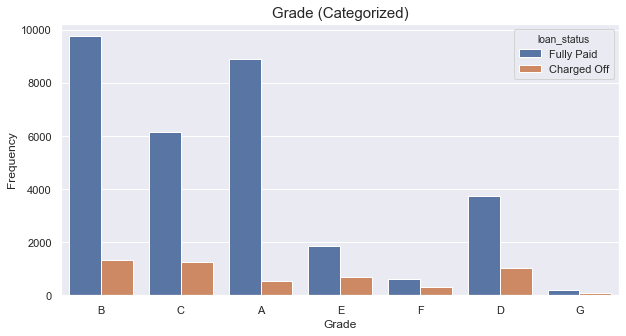

----- Percentage of Fully Paid & Charged Off Loan based on Home Ownership -----
loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0               A          551        8900   9451               5.830071
1               B         1318        9741  11059              11.917895
2               C         1246        6150   7396              16.846944
3               D         1043        3750   4793              21.760901
4               E          674        1848   2522              26.724822
5               F          297         619    916              32.423581
6               G           96         188    284              33.802817


In [54]:
# Basic Statistical Details & Rank-Frequency Plot of Ordered Categorical Variable: grade
print('----- Percentage of Fully Paid & Charged Off Loan based on Employemnt Grade -----')
print(loan_data.groupby(by = 'loan_status').grade.value_counts().sort_index())
print('\n')

plt.figure(figsize=(10,5))
ax1=sns.countplot(x="grade",data=loan_data,hue='loan_status')
ax1.set_title('Grade (Categorized)', fontsize=15)
ax1.set(xlabel='Grade', yLabel='Frequency')
 
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Home Ownership -----')
loan_data_grade = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_grade['Total'] = loan_data_grade['Charged Off'] + loan_data_grade['Fully Paid'] 
loan_data_grade['Chargedoff_Proportion'] = loan_data_grade['Charged Off'] / loan_data_grade['Total'] * 100
loan_data_grade.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_grade)

##### Observation :
    a. From the above table we can say that chances of Charged off loan increases with grade

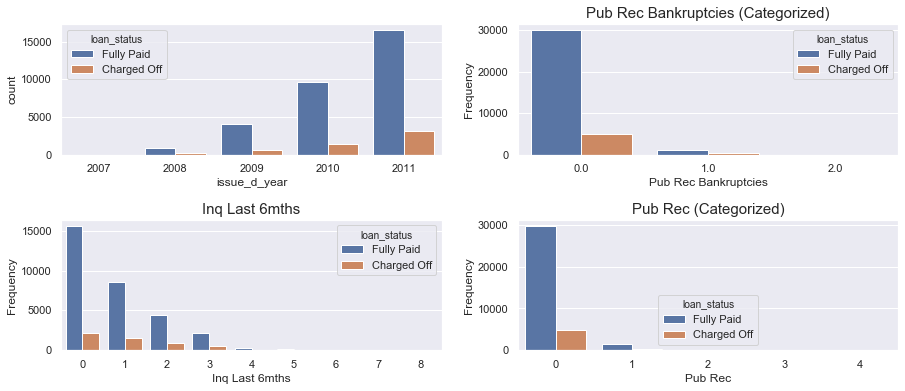

In [44]:
# Rank-Frequency Plot of Ordered Categorical Variable: issue_d_year, pub_rec_bankruptcies, inq_last_6mths, and pub_rec

plt.figure(figsize=(15,6))

plt.subplot(2, 2, 1)
ax2=sns.countplot(x="issue_d_year",data=loan_data,hue='loan_status')
ax1.set_title('Issued Year (Categorized)', fontsize=15)
ax1.set(xlabel='Issued Year', yLabel='Frequency')

plt.subplot(2, 2, 2)
ax2=sns.countplot(x="pub_rec_bankruptcies",data=loan_data,hue='loan_status')
ax2.set_title('Pub Rec Bankruptcies (Categorized)', fontsize=15)
ax2.set(xlabel='Pub Rec Bankruptcies', yLabel='Frequency')

plt.subplot(2, 2, 3)
ax3=sns.countplot(x="inq_last_6mths",data=loan_data,hue='loan_status')
ax3.set_title('Inq Last 6mths', fontsize=15)
ax3.set(xlabel='Inq Last 6mths', yLabel='Frequency')

plt.subplot(2, 2, 4)
ax4=sns.countplot(x="pub_rec",data=loan_data,hue='loan_status')
ax4.set_title('Pub Rec (Categorized)', fontsize=15)
ax4.set(xlabel='Pub Rec', yLabel='Frequency')


plt.subplots_adjust(hspace=0.5)

plt.show()

In [45]:
# Basic Statistical Details of Ordered Categorical Variable: pub_rec
print('\n')
print(loan_data.groupby(by = 'loan_status').pub_rec.value_counts().sort_index())
print('\n')



loan_status  pub_rec
Charged Off  0           4800
             1            415
             2             10
Fully Paid   0          29701
             1           1452
             2             34
             3              7
             4              2
Name: pub_rec, dtype: int64




##### Observations :
    a. From the above graph we can say that, Charged Off Applicants are more in the Loan issued year 2011. This may also be because company has given more loan in the year 2011 compared to previous years.
    b. Almost no loans are extended to people with prior record of bankruptcy >= 2 and very less loan to people with bankruptcy <= 1.
    c. Most number of Charged Off when the number of inqueries is 0, 1, 2
    d. Most of the people do not have public record. Having public record increases the chances of Charge Off significantly.

#### Quantitative or Continuous Variables

count    36421.000000
mean        11.968505
std          3.693508
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5225.0  13.910232  3.646498  5.42  11.49  13.79  16.45  24.40
Fully Paid   31196.0  11.643286  3.600410  5.42   8.59  11.49  13.99  24.11




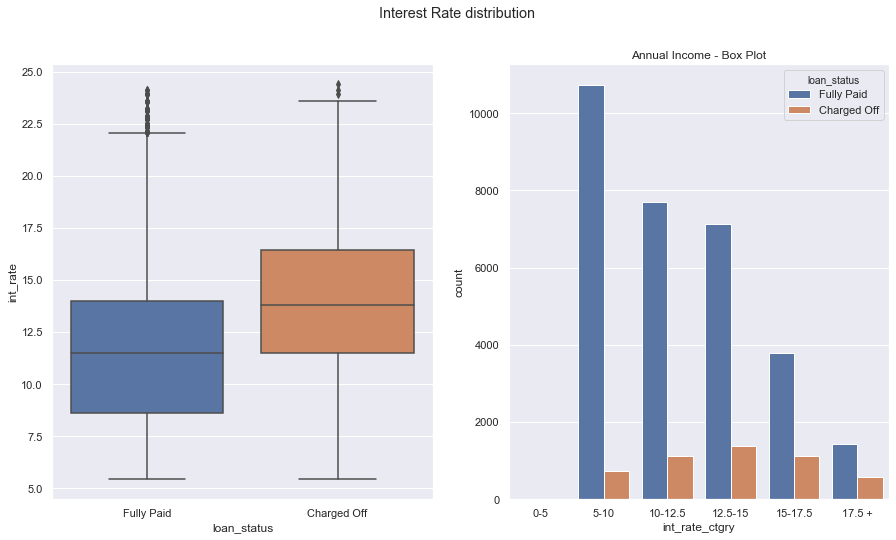

----- Percentage of Fully Paid & Charged Off Loan based on Interest Rate -----
loan_status int_rate_ctgry  Charged Off  Fully Paid  Total  \
0                     5-10          733       10729  11462   
1                  10-12.5         1121        7691   8812   
2                  12.5-15         1379        7118   8497   
3                  15-17.5         1120        3787   4907   
4                   17.5 +          589        1424   2013   

loan_status  Chargedoff_Proportion  
0                         6.395044  
1                        12.721289  
2                        16.229257  
3                        22.824536  
4                        29.259811  


In [55]:
# Box Plots of Quantitative Variable: int_rate
# Rank-Frequency Plot of Derived Ordered Categorical Variable: int_rate_ctgry

print(loan_data.int_rate.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').int_rate.describe())
print('\n')

plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status',y='int_rate',data=loan_data)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Interest Rate - Box Plot')
sns.countplot(x="int_rate_ctgry",data=loan_data,hue='loan_status')

plt.suptitle('Interest Rate distribution')
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Interest Rate -----')
loan_data_int_rate = loan_data.groupby(['int_rate_ctgry', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_int_rate['Total'] = loan_data_int_rate['Charged Off'] + loan_data_int_rate['Fully Paid'] 
loan_data_int_rate['Chargedoff_Proportion'] = loan_data_int_rate['Charged Off'] / loan_data_int_rate['Total'] * 100
loan_data_int_rate.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_int_rate)

#### Observations : 
    1. Interest rate less than 10% has less chances of charged off. Intrest rates are starting from minimin 5 %.
    2. interest rate more than 15% has good chnaces of charged off as compared to other category intrest rates.
    3. Charged off proportion is increasing with higher intrest rates.

count     36421.000000
mean      66004.407221
std       35104.270644
min        4000.000000
25%       41000.000000
50%       59068.000000
75%       81996.000000
max      234996.000000
Name: annual_inc, dtype: float64


               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5225.0  60703.891269  32842.291544  4080.0  38004.0  54000.0   
Fully Paid   31196.0  66892.187573  35391.994360  4000.0  42000.0  60000.0   

                  75%       max  
loan_status                      
Charged Off  75000.00  230000.0  
Fully Paid   83202.42  234996.0  




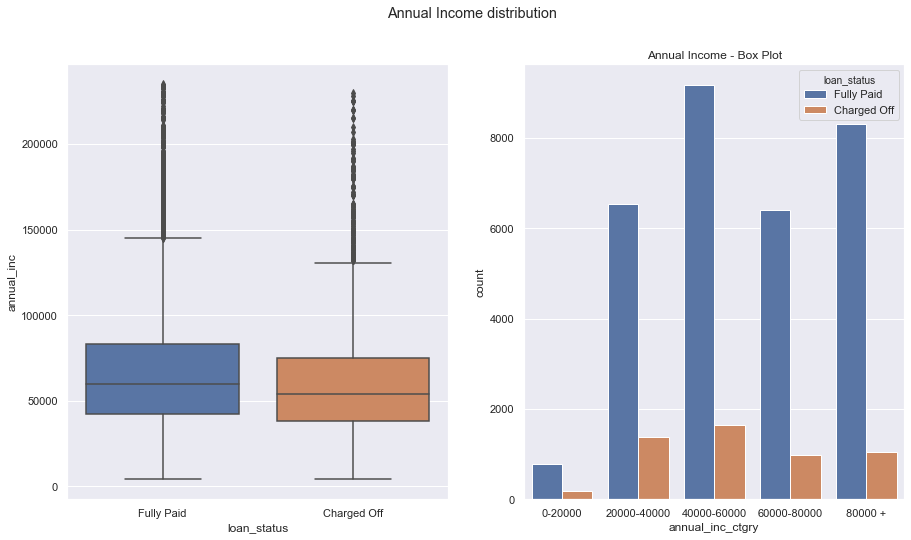

----- Percentage of Fully Paid & Charged Off Loan based on Annual Income -----
loan_status annual_inc_ctgry  Charged Off  Fully Paid  Total  \
0                    0-20000          182         774    956   
1                20000-40000         1384        6539   7923   
2                40000-60000         1647        9167  10814   
3                60000-80000          972        6400   7372   
4                    80000 +         1040        8316   9356   

loan_status  Chargedoff_Proportion  
0                        19.037657  
1                        17.468131  
2                        15.230257  
3                        13.185024  
4                        11.115861  


In [57]:
# Box Plots  of Quantitative Variable: annual_inc
# Rank-Frequency Plot of Derived Ordered Categorical Variable: annual_inc_ctgry

print(loan_data.annual_inc.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').annual_inc.describe())
print('\n')

plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status',y='annual_inc',data=loan_data)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Annual Income - Box Plot')
sns.countplot(x="annual_inc_ctgry",data=loan_data,hue='loan_status')

plt.suptitle('Annual Income distribution')
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on Annual Income -----')
loan_data_annual_inc = loan_data.groupby(['annual_inc_ctgry', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_annual_inc['Total'] = loan_data_annual_inc['Charged Off'] + loan_data_annual_inc['Fully Paid'] 
loan_data_annual_inc['Chargedoff_Proportion'] = loan_data_annual_inc['Charged Off'] / loan_data_annual_inc['Total'] * 100
loan_data_annual_inc.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_annual_inc)

##### Observations :
    a. From the above table we can observe that, lower the annual income, higher the chances of loan getting Charged Off.
    

count    36421.000000
mean        13.395238
std          6.635228
min          0.000000
25%          8.310000
50%         13.500000
75%         18.630000
max         29.990000
Name: dti, dtype: float64


               count       mean       std  min   25%    50%    75%    max
loan_status                                                              
Charged Off   5225.0  14.071443  6.545871  0.0  9.17  14.38  19.30  29.85
Fully Paid   31196.0  13.281981  6.643454  0.0  8.16  13.34  18.51  29.99




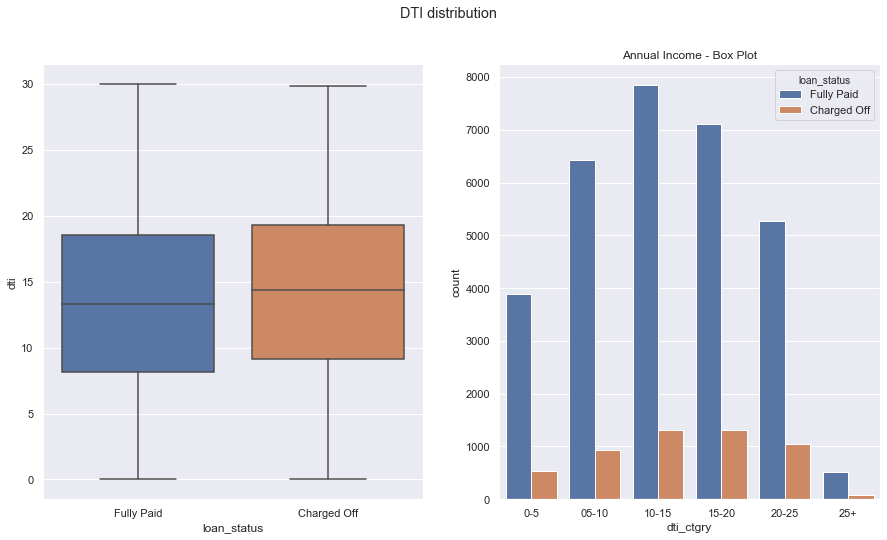

----- Percentage of Fully Paid & Charged Off Loan based on DTI -----
loan_status dti_ctgry  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0                 0-5          541        3888   4429              12.214947
1               05-10          925        6433   7358              12.571351
2               10-15         1305        7848   9153              14.257620
3               15-20         1305        7118   8423              15.493292
4               20-25         1047        5273   6320              16.566456
5                 25+           79         516    595              13.277311


In [58]:
# Box Plots  of Quantitative Variable: dti
# Rank-Frequency Plot of Derived Ordered Categorical Variable: dti_ctgry

print(loan_data.dti.describe())
print('\n')
print(loan_data.groupby(by = 'loan_status').dti.describe())
print('\n')


plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status',y='dti',data=loan_data)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Annual Income - Box Plot')
sns.countplot(x="dti_ctgry",data=loan_data,hue='loan_status')

plt.suptitle('DTI distribution')
plt.show()

print('----- Percentage of Fully Paid & Charged Off Loan based on DTI -----')
loan_data_dti = loan_data.groupby(['dti_ctgry', 'loan_status']).loan_status.count().unstack().reset_index()
loan_data_dti['Total'] = loan_data_dti['Charged Off'] + loan_data_dti['Fully Paid'] 
loan_data_dti['Chargedoff_Proportion'] = loan_data_dti['Charged Off'] / loan_data_dti['Total'] * 100
loan_data_dti.sort_values('Chargedoff_Proportion', ascending=False)

print(loan_data_dti)

##### Observations:
    a. Higher the dti, higher the chances of loan getting charged off

### 2. Bivariate Analysis

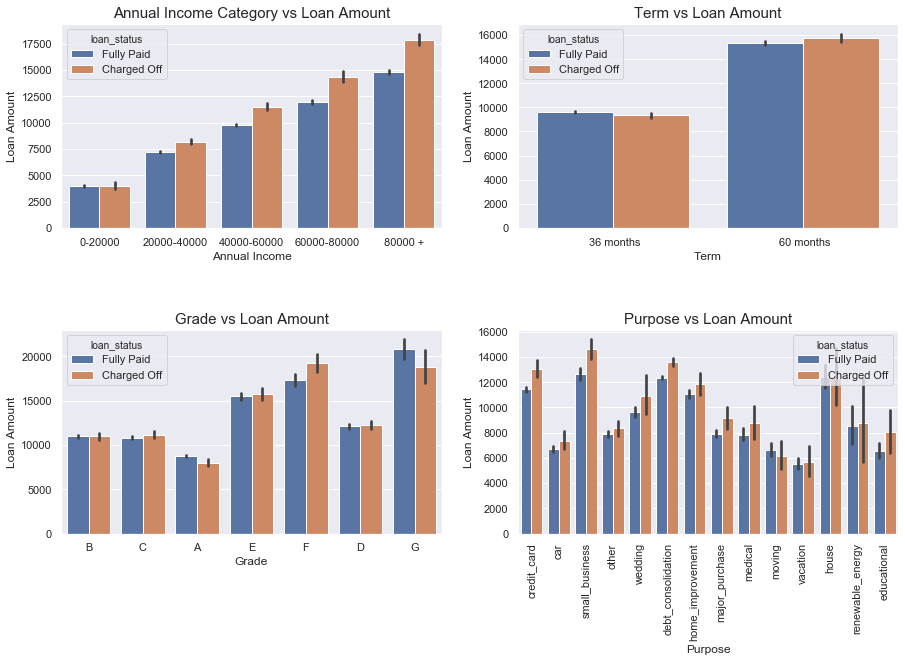

In [73]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
ax1=sns.barplot(x='annual_inc_ctgry', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax1.set_title('Annual Income Category vs Loan Amount', fontsize=15)
ax1.set(xlabel='Annual Income', yLabel='Loan Amount')

plt.subplot(3, 2, 2)
ax2=sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax2.set_title('Term vs Loan Amount', fontsize=15)
ax2.set(xlabel='Term', yLabel='Loan Amount')

plt.subplot(3, 2, 3)
ax3=sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax3.set_title('Grade vs Loan Amount', fontsize=15)
ax3.set(xlabel='Grade', yLabel='Loan Amount')

plt.subplot(3, 2, 4)
ax4=sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax4.set_title('Purpose vs Loan Amount', fontsize=15)
ax4.set(xlabel='Purpose', yLabel='Loan Amount')
plt.xticks(rotation=90)

plt.subplot(3, 2, 5)
ax4=sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax4.set_title('Purpose vs Loan Amount', fontsize=15)
ax4.set(xlabel='Purpose', yLabel='Loan Amount')
plt.xticks(rotation=90)


plt.subplots_adjust(hspace=0.5)

plt.show()

##### Observations :
    a. Even thouh the lower the chances of loan getting charged off with higher income, we see that the highest average loan amount that was charged off is increasing with the higher income.
    b. Loan amount is higher for 60 Months tenure and so is the highest average loan amount that was charged off.
    c. Average loan amount increases with the descrease in grade and has the highest charge off
    d. Earlier we had noticied most of the charged off loans were for debt consolidation, credit card, small business, other. Here we see that these have high average of charged loan as well.

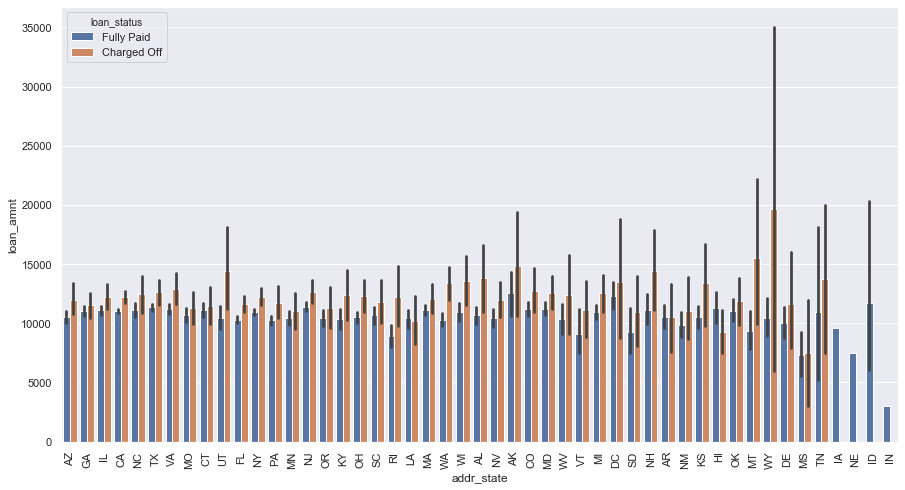

In [76]:
plt.figure(figsize=(15,8))

sns.barplot(x='addr_state', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax1.set_title('Address State vs Loan Amount', fontsize=15)
ax1.set(xlabel='Address State', yLabel='Loan Amount')
plt.xticks(rotation=90)
plt.show()

##### Observations : 
    a. States WY has the the highest average loan amount that was charged off. We need to investigate into for this state.

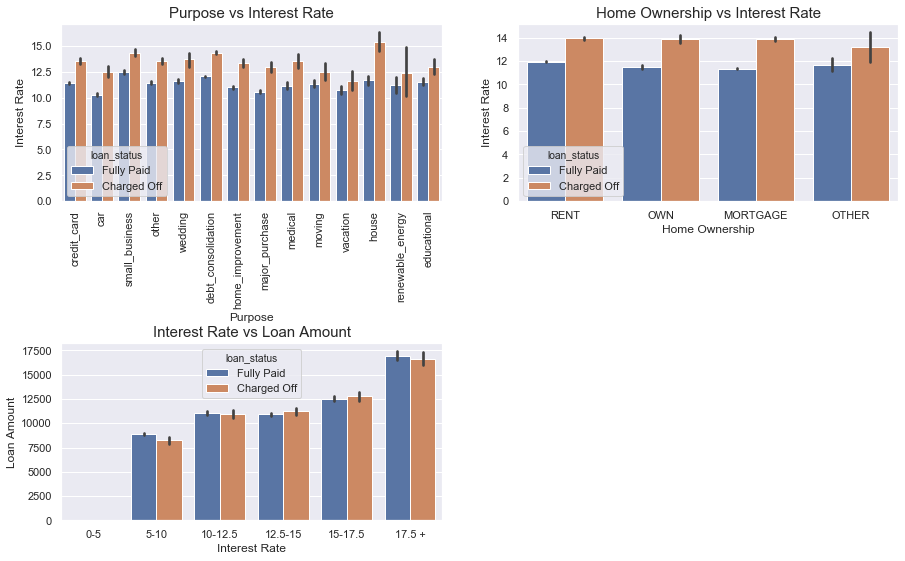

In [88]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
ax1=sns.barplot(x='purpose', y='int_rate', hue="loan_status", data=loan_data, estimator=np.mean)
ax1.set_title('Purpose vs Interest Rate', fontsize=15)
ax1.set(xlabel='Purpose', yLabel='Interest Rate')
plt.xticks(rotation=90)

plt.subplot(3, 2, 2)
ax2=sns.barplot(x='home_ownership', y='int_rate', hue="loan_status", data=loan_data, estimator=np.mean)
ax2.set_title('Home Ownership vs Interest Rate', fontsize=15)
ax2.set(xlabel='Home Ownership', yLabel='Interest Rate')

plt.subplot(3, 2, 3)
ax3=sns.barplot(x='int_rate_ctgry', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax3.set_title('Interest Rate vs Loan Amount', fontsize=15)
ax3.set(xlabel='Interest Rate', yLabel='Loan Amount')

plt.subplot(3, 2, 4)
ax3=sns.barplot(x='int_rate_ctgry', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
ax3.set_title('Interest Rate vs Loan Amount', fontsize=15)
ax3.set(xlabel='Interest Rate', yLabel='Loan Amount')


plt.subplots_adjust(hspace=0.8)

plt.show()

##### Observations : 
    a. Average interest rate were higher for the charged off loan under the category debt consolidation, small business, credit card, house
    b. As the oan amount increases interest rate also increases and so does the average charged off loan amount

<Figure size 1440x720 with 0 Axes>

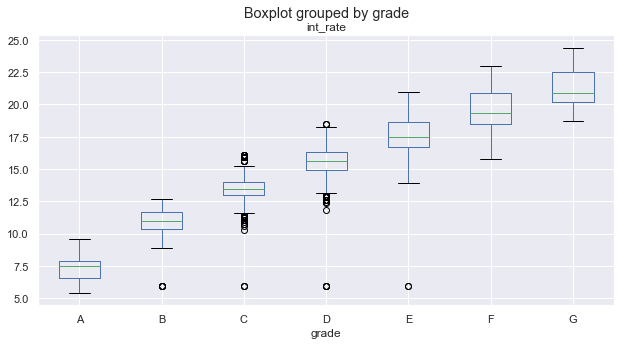

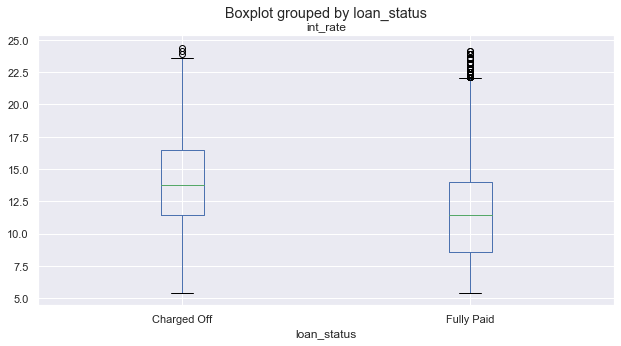

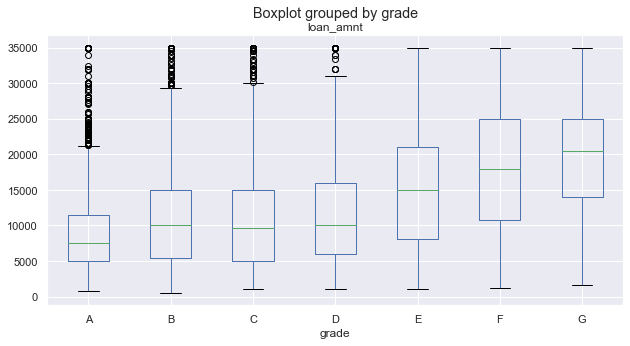

In [93]:
plt.figure(figsize=(20,10))

ax1=loan_data.boxplot(column='int_rate', by='grade',figsize=(10,5))
ax2=loan_data.boxplot(column='int_rate', by='loan_status',figsize=(10,5))
ax3=loan_data.boxplot(column='loan_amnt', by='grade',figsize=(10,5))
plt.show()

##### Observations :
    a. It is clear that intrest rate is increasing with grades moving from A to G.
    b. Charged off loan tend to have higher rate of interest

In [111]:
cont_var= ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
charged_off_data = loan_data[loan_data.loan_status == 'Charged Off']

charged_off_data = charged_off_data[cont_var].corr()
charged_off_data

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,pub_rec,pub_rec_bankruptcies
loan_amnt,1.000000,0.348359,0.449232,0.070950,0.006200,-0.039649,-0.016611
int_rate,0.348359,1.000000,0.163487,0.040983,0.065999,0.083022,0.079085
annual_inc,0.449232,0.163487,1.000000,-0.058750,0.067257,0.009119,0.018741
dti,0.070950,0.040983,-0.058750,1.000000,-0.028158,0.002834,0.017787
inq_last_6mths,0.006200,0.065999,0.067257,-0.028158,1.000000,0.020717,0.013641
pub_rec,-0.039649,0.083022,0.009119,0.002834,0.020717,1.000000,0.857185
pub_rec_bankruptcies,-0.016611,0.079085,0.018741,0.017787,0.013641,0.857185,1.000000


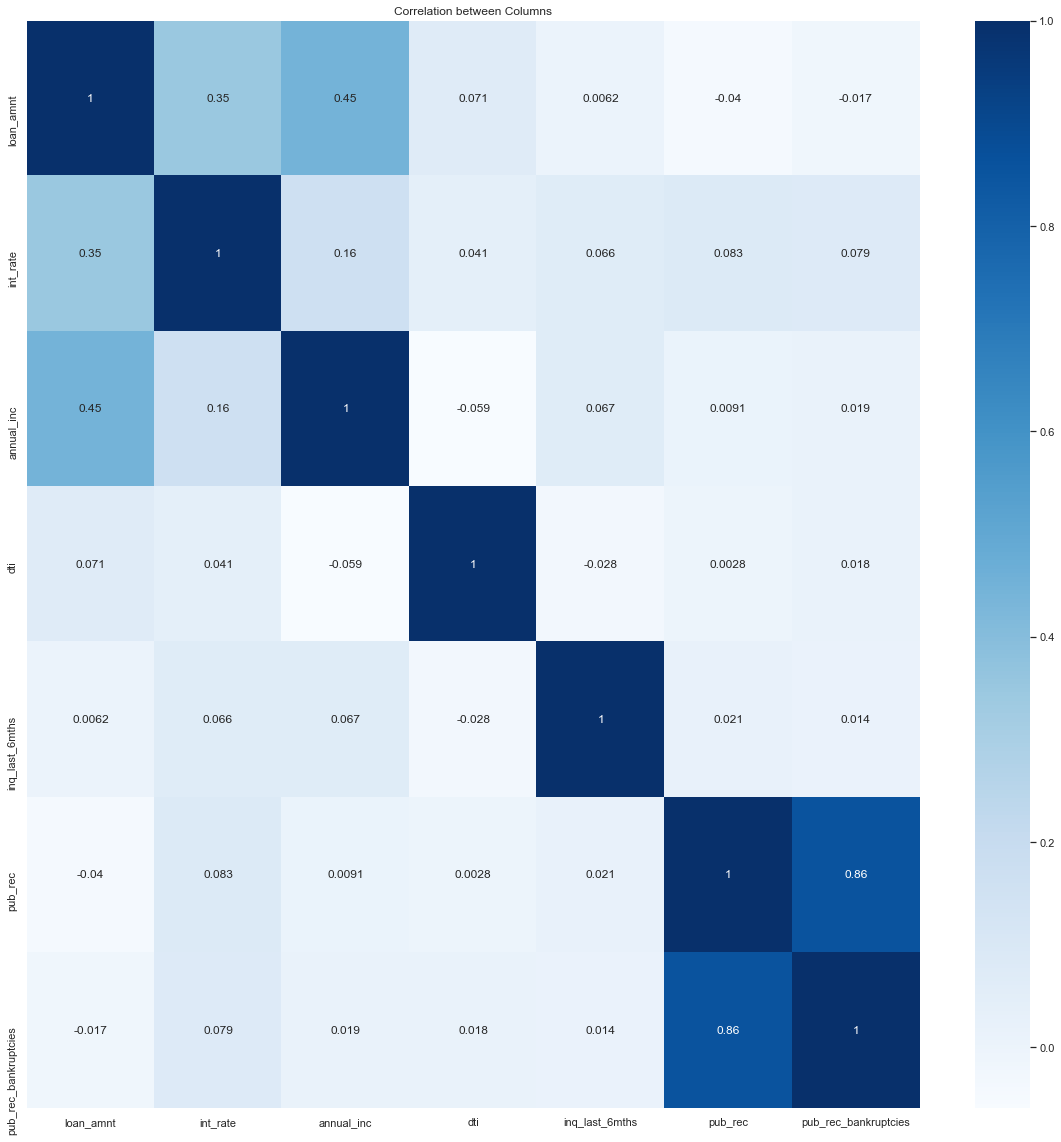

In [130]:
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(charged_off_data, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

##### Observations :
    a. The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.

### Conclusion

##### Major variables affecting the loan getting charged off are as below,
    a. Loan Purpose
    b. Address State
    c. Term
    d. Employment Length
    e. Grade
    f. Interest Rate
    g. Pub Rec Bankruptcies/Pub Rec
    h. Annual Income
    i. Debt to Income Ratio

##### Loan Purpose :
    a. Highest percentage is default is seen for Small Business, Renewable Energy, House. The least default is seen for Wedding and Major Purchase.
    b. debt consolidation, paying credit card bill has the more number of charged off loan this may be due to higher numbers of loan disbursed for the same

##### Address State :
    a. Number of charged off loan is high for Address States for CA, NY,FL, TX & NJ, this may be due to higher number of loan given in these states
    b. States WY, MT, TN, AK has the the highest average loan amount that was charged off, this needs to be investigated as to why there are such high loan amounts getting charged off in these states

##### Term :
    a. Percentage to charged off loans increases with term and also the average charged off loan amount is high for higher term

##### Employment Length :
    a. Charged Off Rate is slightly high for employment length 10+ years,  there ia also high chance of loan getting charged off for employee length 7 years. Overall there is not huge difference between employment length and charged off loan proportion.

##### Grade :
    a. Lower the grade higher the chances of loan getting charged off. Loan amount and Interest Rate increases with decrease in grade.

##### Interest Rate :
    a. Charged off loan rate is directly proportional to Interest rate. As the interest rate increases charged off loan rate increases.

##### Annual Income :
    a. Charged off loan is inversely proportional to Annual Income. As the Annual Income increases charged off loan rate decreases. Charged off rate is highest for 0-20000 income category and decreases with increase in income.
    0-20000     - 19.03%
    20000-40000 - 17.46%

##### Debt To Income Ratio :
    a. As the debt to income ratio increases charged off rate increases
    
    dti_ctgry  Chargedoff_Proportion
    0-5        12.21%
    05-10      12.57%
    10-15      14.25%
    15-20      15.49%
    20-25      16.56%
    25+        13.27%
    

##### Pub Rec Bankruptcies/Pub Rec :
    a. Pub Rec Bankruptcies/Pub Rec are highly positive correlated. Chances of getting loan decreases wit increase in Pub Rec Bankruptcies/Pub Rec. Also having public record increases the chances of Charge Off significantly.